In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# reference:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/
# http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Survival/BS704_Survival5.html

In [6]:
def getsurvival(risk,death,initialval = 1.0):
    risk = np.array(risk)
    death = np.array(death)
    survival = []
    survival.append(initialval)
    index = 1
    for i in range(1,len(risk)):
        tmp1 = survival[i-1] * ((risk[i] - death[i])/risk[i])
        survival.append(tmp1)
    return survival
def getexpectedevents(n1,o,n):
    events = []
    for i in range(len(n1)):
        events.append(n1[i] * (o[i]/n[i]))
    return events

In [7]:
table1 = pd.read_csv('paperdata/table1.csv')
table2 = pd.read_csv('paperdata/table2.csv')
table3d = pd.read_csv('paperdata/table3.csv')

In [8]:
table1.head(15)

,Time,DG1,NG1
0,6,1,23
1,12,1,22
2,21,1,21
3,27,1,20
4,32,1,19
5,39,1,18
6,43,2,17
7,89,1,14
8,261,1,8
9,263,1,78


In [9]:
table2.head(20)

,Time,DG2,NG2
0,9,1,23
1,13,1,22
2,27,1,21
3,38,1,20
4,49,2,18
5,93,1,15
6,126,1,12
7,218,1,9
8,301,1,5
9,333,1,4


In [10]:
table3d.head(50)

,Time,TD,Patient_Died_G2,N,N2
0,6,1,0,46,23
1,9,1,1,45,23
2,12,1,0,44,22
3,13,1,1,43,22
4,21,1,0,42,21
5,27,2,1,40,21
6,32,1,0,39,20
7,38,1,1,38,20
8,39,1,0,37,19
9,43,2,0,36,19


In [11]:
table3 = {'Time':[],
         'N1':[],
          'N2':[],
          'N':[],
          'O1':[],
          'O2':[],
          'O':[]
         }
i = 0
j = 0
data1 = np.array(table1)
data2 = np.array(table2)
index = 0
while(i < len(data1) and j < len(data2)):
    if(data1[i][0] < data2[j][0]):
        table3['N1'].append(data1[i][2])
        table3['N2'].append(0)
        table3['O1'].append(data1[i][1])
        table3['O2'].append(0)
        table3['Time'].append(data1[i][0])
        i+=1
    elif(data1[i][0] > data2[j][0]):
        table3['N2'].append(data2[j][2])
        table3['N1'].append(0)
        table3['O2'].append(data2[j][1])
        table3['O1'].append(0)
        table3['Time'].append(data2[j][0])
        j+=1
    else:
        table3['N1'].append(data1[i][2])
        table3['O1'].append(data1[i][1])
        table3['Time'].append(data1[i][0])
        table3['N2'].append(data2[j][2])
        table3['O2'].append(data2[j][1])
        j+=1
        i+=1
    table3['O'].append(table3['O1'][index] + table3['O2'][index])
    table3['N'].append(table3['N1'][index] + table3['N2'][index])
    index +=1
while(i < len(data1)):
    table3['N1'].append(data1[i][2])
    table3['N2'].append(0)
    table3['O1'].append(data1[i][1])
    table3['O2'].append(0)
    table3['Time'].append(data1[i][0])
    table3['O'].append(table3['O1'][index] + table3['O2'][index])
    table3['N'].append(table3['N1'][index] + table3['N2'][index])
    index +=1
    i+=1
while(j < len(data2)):
    table3['N2'].append(data2[j][2])
    table3['N1'].append(0)
    table3['O2'].append(data2[j][1])
    table3['O1'].append(0)
    table3['Time'].append(data2[j][0])
    table3['O'].append(table3['O1'][index] + table3['O2'][index])
    table3['N'].append(table3['N1'][index] + table3['N2'][index])
    index +=1
    j+=1

In [12]:
# table3df = pd.DataFrame(data=table3)

In [13]:
# table3df.head(50)

In [14]:
table3d.head()

,Time,TD,Patient_Died_G2,N,N2
0,6,1,0,46,23
1,9,1,1,45,23
2,12,1,0,44,22
3,13,1,1,43,22
4,21,1,0,42,21


In [15]:
N1 = []
O1 = []
for i in range(len(table3d)):
    N1.append(table3d['N'][i] - table3d['N2'][i])
    O1.append(table3d['TD'][i] - table3d['Patient_Died_G2'][i])

In [16]:
table3d['N1'] = N1
table3d['O1'] = O1
table3d['O2'] = table3d['Patient_Died_G2']
table3d['O'] = table3d['TD']
table3d = table3d.drop(columns=['Patient_Died_G2','TD'])

In [17]:
table3d.head(50)

,Time,N,N2,N1,O1,O2,O
0,6,46,23,23,1,0,1
1,9,45,23,22,0,1,1
2,12,44,22,22,1,0,1
3,13,43,22,21,0,1,1
4,21,42,21,21,1,0,1
5,27,40,21,19,1,1,2
6,32,39,20,19,1,0,1
7,38,38,20,18,0,1,1
8,39,37,19,18,1,0,1
9,43,36,19,17,2,0,2


In [18]:
table3d['Expected1'] = getexpectedevents(n=table3d['N'],o=table3d['O'],n1=table3d['N1'])
table3d['Expected2'] = getexpectedevents(n=table3d['N'],o=table3d['O'],n1=table3d['N2'])

In [19]:
table3d.head(20)

,Time,N,N2,N1,O1,O2,O,Expected1,Expected2
0,6,46,23,23,1,0,1,0.500000,0.500000
1,9,45,23,22,0,1,1,0.488889,0.511111
2,12,44,22,22,1,0,1,0.500000,0.500000
3,13,43,22,21,0,1,1,0.488372,0.511628
4,21,42,21,21,1,0,1,0.500000,0.500000
5,27,40,21,19,1,1,2,0.950000,1.050000
6,32,39,20,19,1,0,1,0.487179,0.512821
7,38,38,20,18,0,1,1,0.473684,0.526316
8,39,37,19,18,1,0,1,0.486486,0.513514
9,43,36,19,17,2,0,2,0.944444,1.055556


In [20]:
sums= table3d.sum()

In [21]:
sums

Time         2554.000000
N             622.000000
N2            317.000000
N1            305.000000
O1             13.000000
O2             11.000000
O              24.000000
Expected1      11.779847
Expected2      12.220153
dtype: float64

In [22]:
X1 = ((sums['O1'] - sums['Expected1']) **2)/(sums['Expected1'])
X2 = ((sums['O2'] - sums['Expected2']) **2)/(sums['Expected2'])
X = X1 + X2

In [23]:
print (X)

0.2482123942314774


In [24]:
def kmplot(time,survival,title=""):
    plt.plot(time,survival)
    plt.xlabel("Time")
    
    plt.title("Time vs Survival Curve "+title)
    
    plt.ylabel("Survival Property")
#     plt.scatter(time,survival)
    plt.legend()
    

In [25]:
table1['Survival_G1'] = getsurvival(risk=table1['NG1'],death=table1['DG1'])
table2['Survival_G2'] = getsurvival(risk=table2['NG2'],death=table2['DG2'])

In [26]:
table1['Survival_G1']

0     1.000000
1     0.954545
2     0.909091
3     0.863636
4     0.818182
5     0.772727
6     0.681818
7     0.633117
8     0.553977
9     0.546875
10    0.455729
11    0.341797
Name: Survival_G1, dtype: float64

Text(266.8, 0.503, 'Median: 266.5')

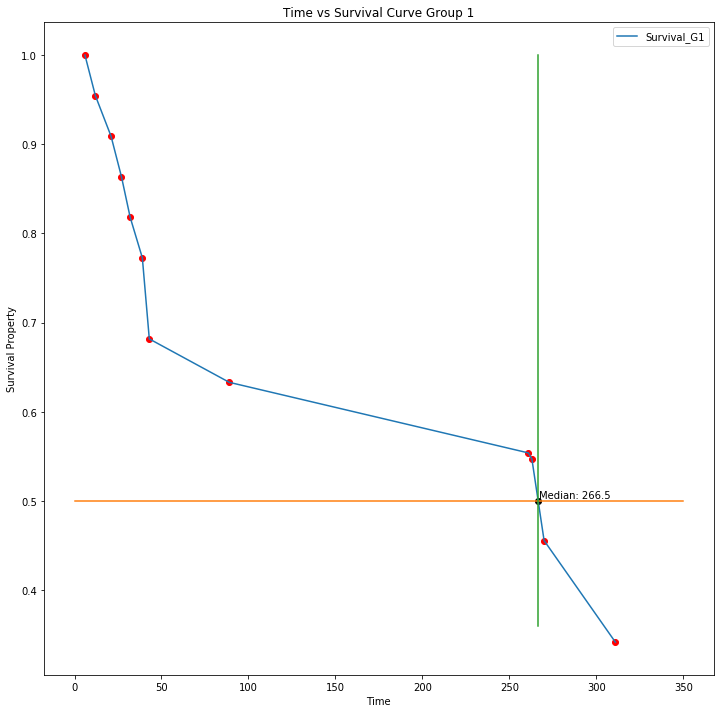

In [40]:
plt.figure(figsize=(12,12))
kmplot(table1['Time'],table1['Survival_G1'],title="Group 1")
plt.scatter(table1['Time'],table1['Survival_G1'],color='r')
plt.plot([0,350],[0.5,0.5])
plt.plot([266.5,266.5],[0.36,1])
plt.scatter([266.5],[0.5],color='black')
plt.text(266.8,0.503,"Median: 266.5")
# plt.legend('Median')

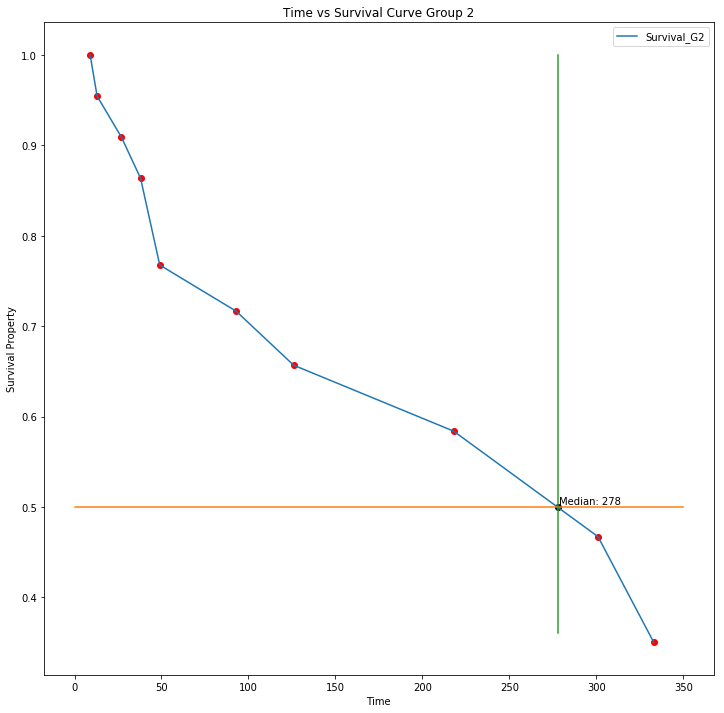

In [38]:
plt.figure(figsize=(12,12))
kmplot(table2['Time'],table2['Survival_G2'],title="Group 2")
plt.scatter(table2['Time'],table2['Survival_G2'],color='r')
plt.plot([0,350],[0.5,0.5])
plt.plot([278,278],[0.36,1])
plt.text(278.7,0.503,"Median: 278")
plt.scatter(278,0.5,color='black')

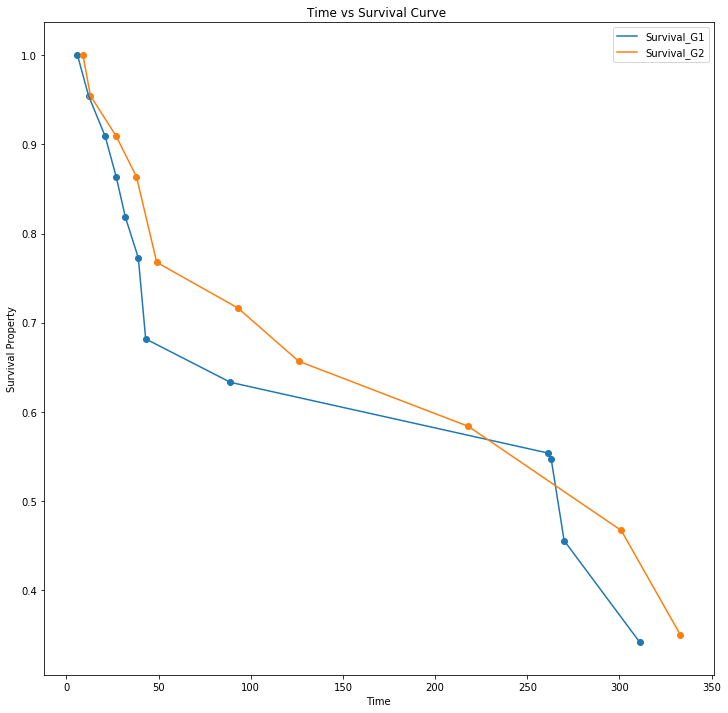

In [29]:
plt.figure(figsize=(12,12))
kmplot(table1['Time'],table1['Survival_G1'])

kmplot(table2['Time'],table2['Survival_G2'])
plt.scatter(table1['Time'],table1['Survival_G1'])
plt.scatter(table2['Time'],table2['Survival_G2'])

The test statistic value is less than the critical value (using chi-square table) for degree of freedom equal to one. Hence, we can say that there is no significant difference between the two groups regarding the survival.